<a href="https://colab.research.google.com/github/choeuibin/Ubion-Python/blob/main/0109(easy_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import 시작

In [ ]:
#def file_import():
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from pandas.errors import InvalidIndexError

#file read 함수

In [ ]:
def read_file(file_address) :
  print("-------------- file read ---------------")
  df = pd.read_csv(file_address, encoding = "cp949")
  df = pd.DataFrame(df)
  return df


#정규화 함수

In [ ]:
def normalization(df, column_number):
  print("-------------- normalization ---------------")
  df[df.columns[column_number]] = np.log1p(df[df.columns[column_number]])
  sns.distplot(df[df.columns[column_number]])
  return df 


#IQR 함수

In [ ]:
def data_IQR(df,column_number) :
  print("-------------- Data_IQR ---------------")
  q1 = df[df.columns[column_number]].quantile(q=0.25)
  q3 = df[df.columns[column_number]].quantile(q=0.75)
  IQR = q3-q1
  data_IQR2 = df[(df[df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (df[df.columns[column_number]] > q1 - IQR * 1.5)]
  sns.distplot(df[df.columns[column_number]])
  return data_IQR2

#train_test 준비과정

In [ ]:
from typing_extensions import dataclass_transform
def before_making_model(df, x_list, column_number):
  cg = x_list
  X = df[cg]
  Y = df[df.columns[column_number]]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  ct = ColumnTransformer([('onehot',OneHotEncoder(sparse = False),cg)])
  ct.fit(X_train)
  X_train = ct.transform(X_train)
  X_test = ct.transform(X_test)
  return [X_train, X_test, Y_train, Y_test]

#column index 확인 함수

In [ ]:
def print_columns(df):
  column = pd.DataFrame(df.columns)
  print(column)


#선형함수

In [ ]:
def linearRegress(train_test_data):
  print("----------LinearRegression value-----------")
  X_train = train_test_data[0]
  X_test = train_test_data[1]
  Y_train = train_test_data[2]
  Y_test = train_test_data[3]

  lr = LinearRegression().fit(X_train, Y_train) 
  Y_pred = lr.predict(X_test)
  print("predict value\n",Y_pred)
  print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
  print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 
  rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
  print("RMSE : {:.3f}". format(rmse)) 
  return [Y_pred, Y_test]


#인덱스 다시 셋팅

In [ ]:
def Reset_index(Y_test,column_number):
  Y_test_df = (pd.DataFrame(Y_test)).reset_index()
  Y_test_df = pd.DataFrame(Y_test_df[df.columns[column_number]])
  return Y_test_df


#예측값과 test값 확인

In [ ]:
def plot_picture(Y_pred,Y_test):
  print("----------- plot grow----------- ")
  %matplotlib Inline
  plt.plot(Y_pred)
  plt.plot(Y_test)

#본문

-------------- file read ---------------
-------------- normalization ---------------
-------------- Data_IQR ---------------
          0
0        날짜
1        품목
2        등급
3      거래단위
4       최저가
5       최고가
6       평균가
7  전일대비\n등락
8  전일\n평균대비
----------LinearRegression value-----------
predict value
 [9.54272283 9.49603336 8.86699814 8.92837165 9.31354594 9.1530449
 8.86699814 9.31354594 9.49603336 9.13556215 9.54272283 8.64232489
 8.92837165 9.08887269]
train R2 : 0.771
test R2 : -0.251
RMSE : 0.330
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


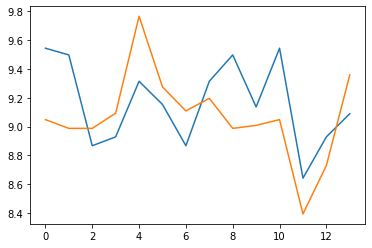

In [ ]:
#file_import()

df = read_file("/content/drive/MyDrive/파이썬/감귤3.csv")
df = normalization(df, 6)
df = data_IQR(df,6)
print_columns(df)
train_test_data = before_making_model(df,[df.columns[2],df.columns[3]],6)
Y_value = linearRegress(train_test_data)
Y_test = Reset_index(Y_value[1],6)
plot_picture(Y_value[0],Y_test)